# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# mouse_metadata.info()
# study_results.info()

combined = pd.merge(mouse_metadata, study_results, on ="Mouse ID")
# Display the data table for preview

combined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [83]:
# Checking the number of mice.
combined["Mouse ID"].nunique()

249

In [84]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

combined["Duplicated"] = combined.duplicated(subset=['Mouse ID','Timepoint'],keep=False)



In [85]:
# Optional: Get all the data for the duplicate mouse ID.
duplicatesonly = combined.loc[combined['Duplicated'] == True,:]

duplicatesonly


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [86]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleanresults = combined.loc[combined['Mouse ID'] != 'g989',:].drop(columns=['Duplicated'])

cleanresults


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [101]:
# Checking the number of mice in the clean DataFrame.
cleanresults["Mouse ID"].nunique()




248

## Summary Statistics

In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
def sem(data):
    sem_value = data.sem()
    return sem_value

summary = cleanresults.groupby(['Drug Regimen'],as_index = True).agg({'Tumor Volume (mm3)':['mean','median','std','var',sem]})

grouped_df = pd.DataFrame(summary)

grouped_df




<bound method IndexOpsMixin.value_counts of 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1880, dtype: object>

In [89]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

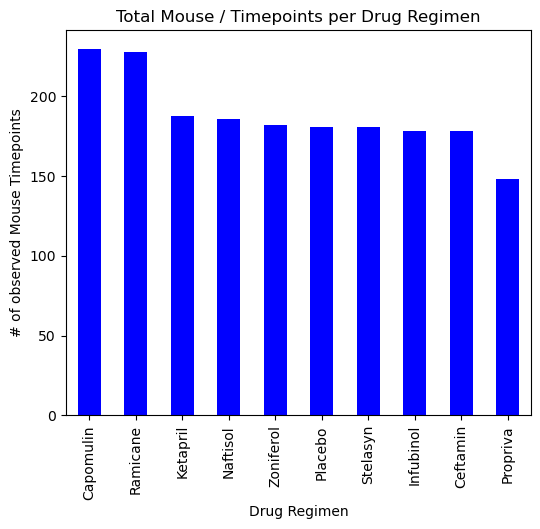

In [90]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

MouseTimes = cleanresults["Drug Regimen"].value_counts()

FirstBarChart = MouseTimes.plot(kind="bar", facecolor="blue", figsize=(6,5),
                                title="Total Mouse / Timepoints per Drug Regimen",
                                xlabel="Drug Regimen",ylabel="# of observed Mouse Timepoints")


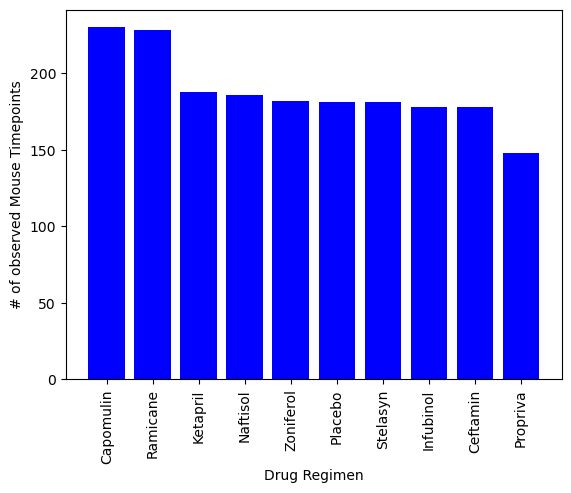

In [91]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts= cleanresults["Drug Regimen"].value_counts()

x_axis= drug_counts.index
y_axis = drug_counts.values

plt.bar(x_axis,y_axis,color="blue")

plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.xticks(rotation=90)

plt.show()


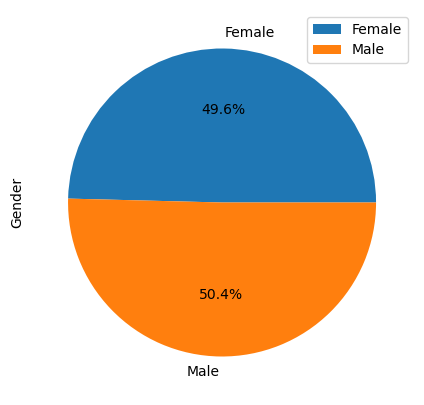

In [92]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

micegender = cleanresults.groupby(cleanresults["Sex"]).agg({"Mouse ID":['nunique']})

# Make the pie chart
pieplot = micegender.plot(kind="pie",ylabel='Gender', figsize=(5, 5), autopct='%1.1f%%', subplots=True)

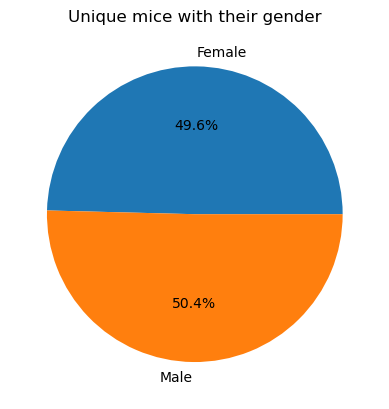

In [93]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender)
micegender = cleanresults.groupby(cleanresults["Sex"]).agg(uniquemice=("Mouse ID",'nunique'))

micegender_df = pd.DataFrame(micegender)

# Make the pie chart

plt.pie(micegender["uniquemice"], labels = ['Female','Male'],autopct='%1.1f%%')
plt.title("Unique mice with their gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [144]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

cleanresults['MaxTimepoint'] = cleanresults.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].transform('max')
# greatesttimes= cleanresults.groupby(cleanresults["Drug Regimen"]).agg(Timepoint=("Timepoint",'max'))


# Filter the DataFrame to keep only the rows with the greatest timepoint for each mouse within each drug regimen
greatesttimes_results = cleanresults[cleanresults['Timepoint'] == cleanresults['MaxTimepoint']].sort_values(by='Mouse ID')

# Drop the additional column used for filtering
greatesttimes_results.drop(columns=['MaxTimepoint'], inplace=True)

boxplottable = greatesttimes_results.reset_index(drop=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
boxplottable = pd.DataFrame(pd.merge(greatesttimes_results,cleanresults, on =['Timepoint', 'Mouse ID'], how="inner",)).sort_values(by="Mouse ID")

boxplottable.drop(columns=['Sex_y', 'Age_months_y', 'Weight (g)_y','Tumor Volume (mm3)_y','MaxTimepoint', 'Metastatic Sites_y', 'Drug Regimen_y'], inplace=True)

boxplottable




,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [147]:
# Put treatments into a list for for loop (and later for plot labels)
promisingtreatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    
tumor_volumes = []
tumor_volumes_df = pd.DataFrame(columns=['Tumor Volume (mm3)','Treatment'])

for treatment in promisingtreatments:
    treatment_data = boxplottable[boxplottable['Drug Regimen_x'] == treatment]
    tumor_volumes.extend(treatment_data['Tumor Volume (mm3)_x'])
    
    temp_df = pd.DataFrame({'Tumor Volume (mm3)': tumor_volumes, 'Treatment': treatment})
    tumor_volumes_df = pd.concat([tumor_volumes_df, temp_df])

tumor_volumes_df

# Calculate the IQR and quantitatively determine if there are any potential outliers

quartiles = tumor_volumes_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

# Determine outliers using upper and lower bounds
lowerbound = lowerq - (1.5 * iqr)
upperbound = upperq + (1.5 * iqr)

lowerbound = lowerbound.item()
upperbound= upperbound.item()

outliers = tumor_volumes_df.loc[(tumor_volumes_df['Tumor Volume (mm3)'] < lowerbound) | (tumor_volumes_df['Tumor Volume (mm3)'] > upperbound)]
tumor_volumes_df.tail()


C:\Users\amy_d\AppData\Local\Temp\ipykernel_25904\2676199062.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tumor_volumes_df = pd.concat([tumor_volumes_df, temp_df])


,Tumor Volume (mm3),Treatment
95,45.000000,Ceftamin
96,64.634949,Ceftamin
97,61.386660,Ceftamin
98,68.594745,Ceftamin
99,64.729837,Ceftamin


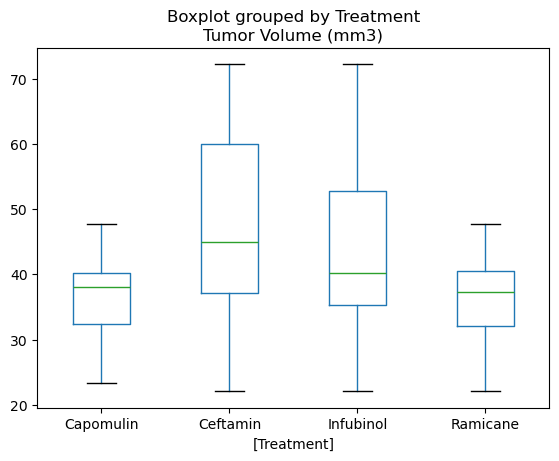

In [148]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

boxplot = tumor_volumes_df.boxplot(grid=False, by='Treatment')


## Line and Scatter Plots

In [97]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [98]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [99]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
